# The Sparks Foundation

### Name: Maddu Vijay Kumar

## Task-1:

#### Predict the percentage of a student based on the no. of study hours.

#### To Predict - What will be predicted score if a student studies for 9.25 hrs/ day?

# Step-1:

## Importing All Libraries that are required

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Step-2:

## Importing Required DataSet

In [43]:
url="http://bit.ly/w-data"
dataset=pd.read_csv(url)

In [44]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Step-3:

## Checking if there any null values in the dataset if null values clean the data

In [45]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step-4:

## Visualizing the distribution of Scores

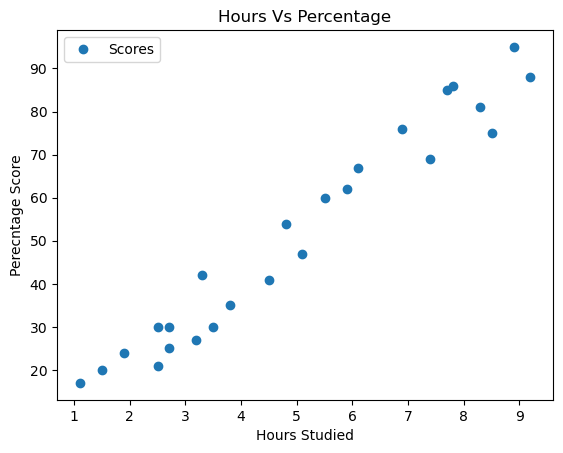

In [46]:
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Perecntage Score")
plt.show()

#### From the graph above it is clearly describes that there is a positive linear relation between the number of hours studied and percentage score

# Step-5:

## Preparing the data

In [52]:
columns=list(dataset.columns)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

#### Now here we have our attributes and labels , the next step is to split this data into training and test sets. we will do it using train_test_split() method

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# Step-6:

## Train the Algorithm

#### Now we have split our data into training and test sets . Now we have to train our Algorithm

In [54]:
#create a linear regression object
regressor=LinearRegression()

#Train the model

regressor.fit(X_train,y_train)
print("Training Completed")

Training Completed


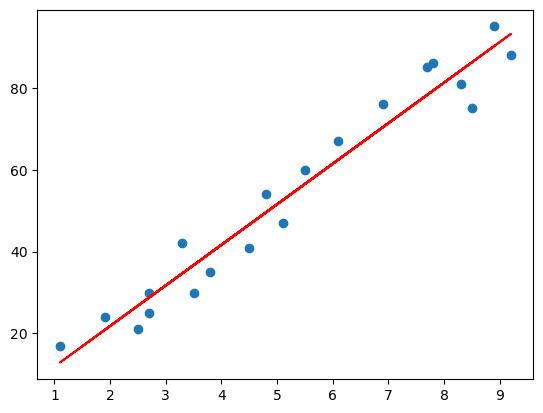

In [119]:
#plot the Regression_Line 
line=regressor.coef_*X+regressor.intercept_
plt.scatter(X_train,y_train )
plt.plot(X,line,color="red")
plt.show()

# Step-7:

## Making Predictions

In [79]:
y_pred=regressor.predict(X_test)
y_pred 

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Step-8:

## Visualizing Test Data

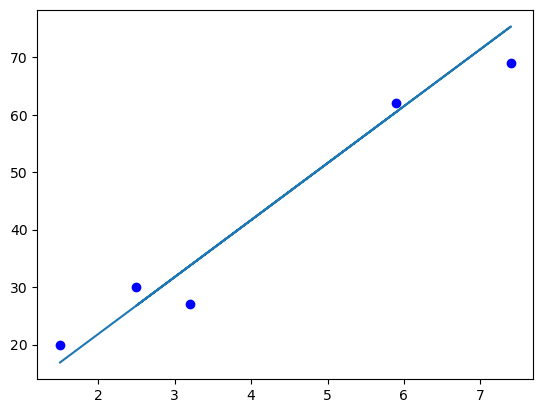

In [98]:
plt.scatter(X_test,y_test,color="b")
plt.plot(X_test,y_pred)
plt.show()

### Comparing Actual Vs Predicted Values

In [101]:
#make a dataframe
df=pd.DataFrame({"Hours":X_test.reshape(-1),'Actual Score': y_test,'Predicted Score': y_pred})
df

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


# Step-9:

## Predicting Percentage Score for given Studied hours

In [66]:
hours=[9.25]
res=regressor.predict([hours])
print("No.of Hours = {}".format(hours))
print("Predicted Percentage Score = {}".format(res))

No.of Hours = [9.25]
Predicted Percentage Score = [93.69173249]


In [67]:
regressor.coef_

array([9.91065648])

In [68]:
regressor.intercept_

2.018160041434662

# Step-10:

## Visualizing the accuracy of the model

In [102]:
#Sort the data based on hours
df_sorted=df.sort_values(by="Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


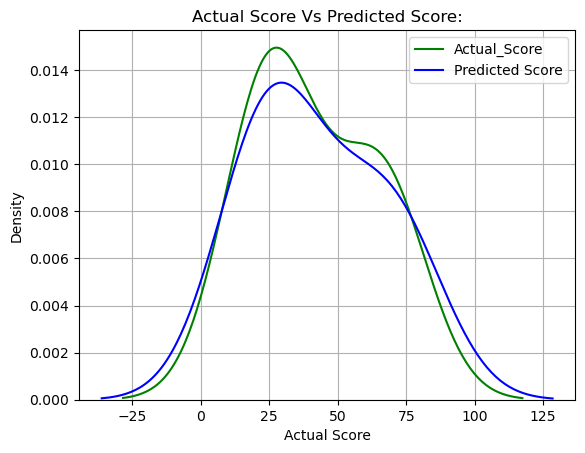

In [109]:
a=sns.kdeplot(df_sorted["Actual Score"],color="green",label="Actual_Score")
b=sns.kdeplot(df_sorted["Predicted Score"],color="blue",label="Predicted Score")
plt.legend()
plt.title("Actual Score Vs Predicted Score:")
plt.grid()
plt.show()

## Predict Percentage Scores for Sample Data

In [92]:
hr=list(map(float,input("Enter Studied hours:").split()))
scores=regressor.predict([hr])

Enter Studied hours:2.4


In [93]:
print("Percentage Score ={} ".format(scores))

Percentage Score =[25.80373559] 


# Step-11:

## Evaluate the model

#### The final step is to evaluate the model to check how well our model is performing to predict

In [116]:
print("Absolute Mean Error = ",metrics.mean_absolute_error(y_test,y_pred))
print("Correlation=", r2_score(y_train,regressor.predict(X_train)))
print("Accuracy = ", r2_score(y_test,y_pred))

Absolute Mean Error =  4.183859899002982
Correlation= 0.9515510725211552
Accuracy =  0.9454906892105354
